In [1]:
import numpy as np
import TMQGP as tm
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad
from scipy.integrate import tplquad
from scipy import signal
import tqdm

/home/hshah21/jupy/jup_notebook/lib/python3.10/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/hshah21/jupy/jup_notebook/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/hshah21/jupy/jup_notebook/lib/python3.10/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/hshah21/jupy/jup_notebook/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
omrange = np.linspace(-5, 5, 300)

# Analytic ImPi

In [3]:
#Fixed Inputs parameters
a0=6.75
a1=-1.95
a2=2.625
a3=-7.44
b3=0.75
b4=7.5
T0=0.27 #GeV #Critical point in purely gluonic field
Nf=3 #Number of quark flavor
G=10.08 #(GeV)^2
m0=5.5/1000 #MeV Current quark mass
m1=500/1000 #MeV Constituent quark mass
 #Change it afterwards
Nc=2 #May change afterwards
Λ=0.651 #Cutoff Momentum 

#Fermi Dirac distribution function
def f(E,β):
    return 1/(1+np.exp(β*E))


#Imaginary part of pion polarization operator 
def ImP(ω,u,T,m=0.325): #made m as argument,where if I don't put the value of m while calling the function, it will be assumed as 0.325  
    β=1/T
    if ω==0:
        return 0
   #res=Nc*Nf*ω**2/8*np.pi
    #res*=(1-4*m1**2/ω**2)**0.5
    return np.nan_to_num((np.sign(ω)*Nc*Nf*ω*(((ω**2-(2*m)**2))**0.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*np.pi))
#
#Getting the real part using Kramer Kronig's rules
def ReP(ω,u,T,m=0.325):
    f= lambda ω0:(ImP(ω0,0,T,m)/np.pi)
    return quad(f,-10,10,weight='cauchy',wvar=ω)[0]

def ImS(ω,u,T,m=0.325):
    β=1/T
    if ω==0:
        return 0
    return np.nan_to_num((np.sign(ω)*Nc*Nf*((ω**2 - (2*m)**2)**1.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*ω*np.pi))


def ReS(ω,u,T,m=0.325):
    f= lambda ω0:(ImS(ω0,0,T,m)/np.pi)
    return quad(f,-10,10,weight='cauchy',wvar=ω)[0]

In [10]:
Impp=[ImP(s,0,0.01, 0.325) for s in omrange]
Impp = np.array(Impp)

/tmp/ipykernel_10270/1260825283.py:29: RuntimeWarning: invalid value encountered in scalar power
  return np.nan_to_num((np.sign(ω)*Nc*Nf*ω*(((ω**2-(2*m)**2))**0.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*np.pi))


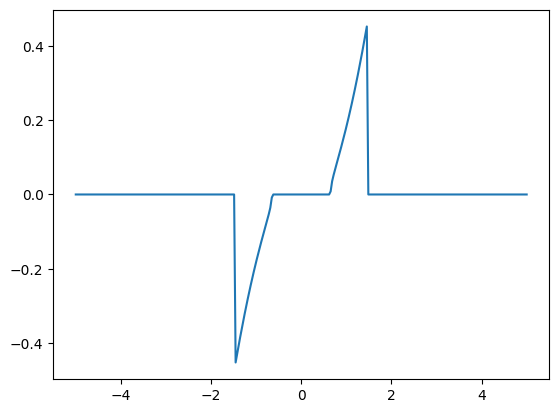

In [11]:
plt.plot(omrange, Impp)

# Loops equation 51 with G_m

In [14]:
Impi_array = np.array([tm.Impi_int(i, 0.01, 0.325, 0.1) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_10270/870968560.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  Impi_array = np.array([tm.Impi_int(i, 0.01, 0.325, 0.1) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/300 [00:00<?, ?it/s]

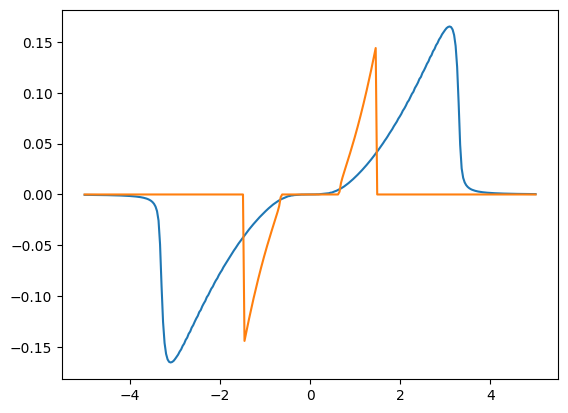

In [15]:
plt.plot(omrange, -Impi_array)
plt.plot(omrange, Impp/np.pi)

# Python Calculation

In [8]:
#def G0(p0, p, m, eps):
 #   return np.imag(p0/(p0**2 - p**2 - m**2 + 1j*eps*np.sign(p0)))
#def Gv(p0, p, m, eps):
#    return np.imag(p/(p0**2 - p**2 - m**2 + 1j*eps*np.sign(p0)))
#def Gm(p0, p, m, eps):
#    return np.imag(m/(p0**2 - p**2 - m**2 + 1j*eps*np.sign(p0)))

In [9]:
#def im_pi(p, z, x, ω, m, T, eps):
    #coeff = p**2 * G0(z, p, m, eps) * G0(z - ω, p, m, eps)
    #coeff += p**2 * x * Gv(z, p, m, eps) * Gv(z - ω, p, m, eps)
    #coeff += -(p**2) * Gm(z, p, m, eps) * Gm(z - ω, p, m, eps)
    #coeff *=  (np.tanh((z - ω)/2/T) - np.tanh(z/2/T))/2/np.pi**3
    #return coeff
    
     

In [10]:
#def integ(ω, m, T, eps):
 #   f = lambda j, k, l: im_pi(j, k, l, ω, m ,T, eps)
  #  return quad(f, 0,3, -2,2, -1,1)[0]

In [11]:
#def integ(ω, m, T, eps):
 #   f = lambda l, k, j: im_pi(j, k, l, ω, m, T, eps)
  #  result, _ = tplquad(f, 0, 2, lambda l: -1, lambda l: 1, lambda l, k: -2, lambda l, k: 2)
   # return result


In [12]:
#array = [integ(i, 0.5, 0.1, 0.001) for i in tqdm.tqdm_notebook(omrange)]

# Harada Nemoto ImPi

In [16]:
Impi2_array = np.array([tm.Impi_int2(1, i, 0.01, 0.325, 0.05) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_10270/1000004767.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  Impi2_array = np.array([tm.Impi_int2(1, i, 0.01, 0.325, 0.05) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/300 [00:00<?, ?it/s]

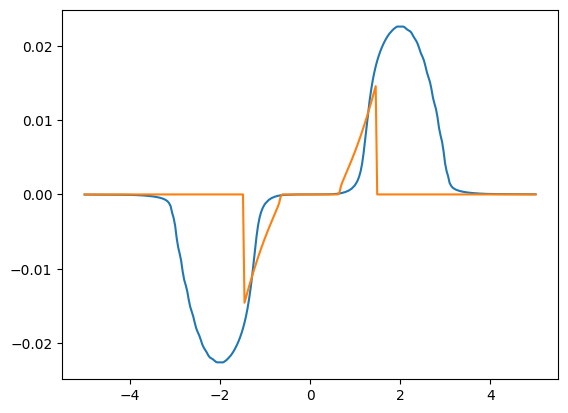

In [21]:
plt.plot(omrange, -Impi2_array)
plt.plot(omrange, Impp/np.pi**3)